In [334]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scienceplots
import cv2

plt.style.use(['science', 'grid'])
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['font.size'] = 8
plt.rcParams['lines.markersize'] = 2.5

T = lambda I: 108.0958765*I*I*I-511.9765339*I*I+1617.95649045*I+537.60415503


def image_hist_and_peak(image_path, joinby=1, plot=False, savefig=False, crop=None):
    xlim = [45, 256]
    ylim = [0, 100]

    # Load the image in grayscale
    img_array = cv2.imread(image_path, cv2.IMREAD_COLOR_RGB)
    if crop is not None:
        img_array = img_array[crop[0]:crop[1]]
    r,g,b = cv2.split(img_array)
    peaks_by_color = []

    for name, pixels in zip(['red', 'green', 'blue'], [r, g, b]):
        # Create histogram
        histogram, _ = np.histogram(pixels.flatten(), bins=256, range=(0, 256))
        x = np.array(range(0, 256, joinby))
        joined_histogram = np.array([sum(histogram[i:i+joinby]) for i in x])

        # Find the peaks
        modified_histogram = joined_histogram.copy()
        modified_histogram *= (x > xlim[0])
        peaks, _ = find_peaks(modified_histogram, height=0.7*max(modified_histogram))
        if len(peaks) != 0:
            peak_brightness = x[peaks][-1]
            peak_count = joined_histogram[peaks][-1]
        else:
            peak_brightness = 255
            peak_count = ylim[1] // 2

        peaks_by_color.append(peak_brightness)

        if plot:
            plt.bar(x, joined_histogram, width=joinby, color=name, alpha=0.3)
            plt.plot(peak_brightness, peak_count, 'o', color=name)
            plt.text(peak_brightness, peak_count*1.05, f'{peak_brightness:.0f}', ha='center', va='bottom', color=name)

    if plot:  
        plt.title(f'histogram {image_path}')
        plt.xlabel('Pixel Brightness (0-255)')
        plt.ylabel('Pixel Count')
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.grid(alpha=0.15, which='minor')
        plt.grid(alpha=0.5, which='major')

        # Show plot
        plt.tight_layout()
        if savefig:
            plt.savefig(f'images/hist_{image_path}')
        plt.show()


    return np.array(peaks_by_color)

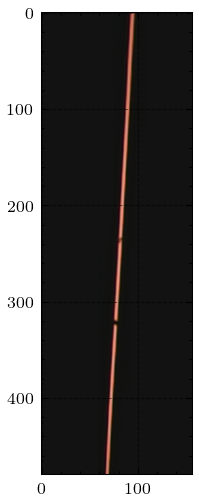

[0:60]


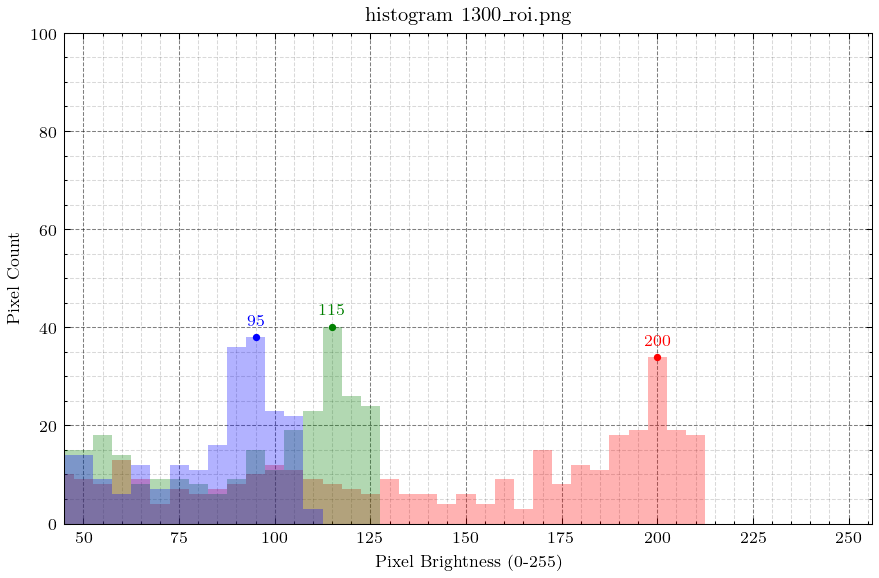

[40:100]


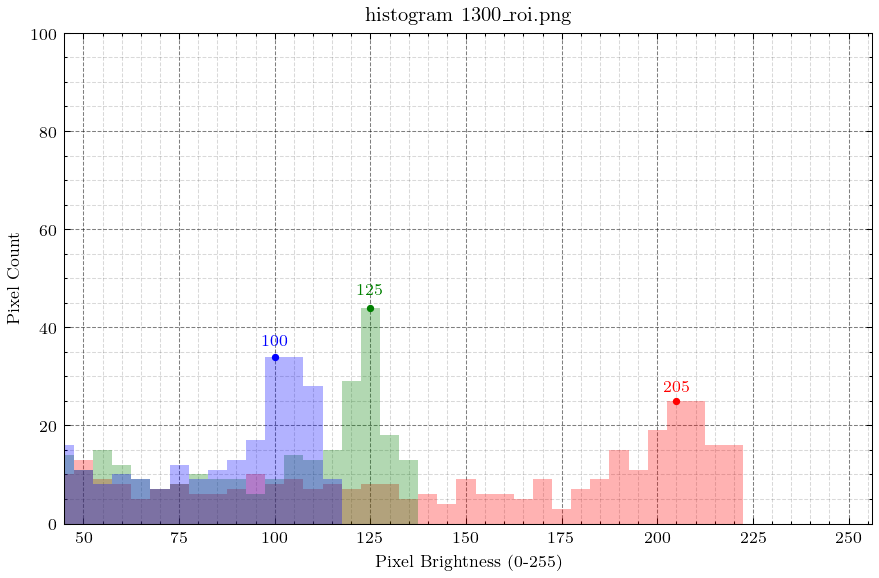

[80:140]


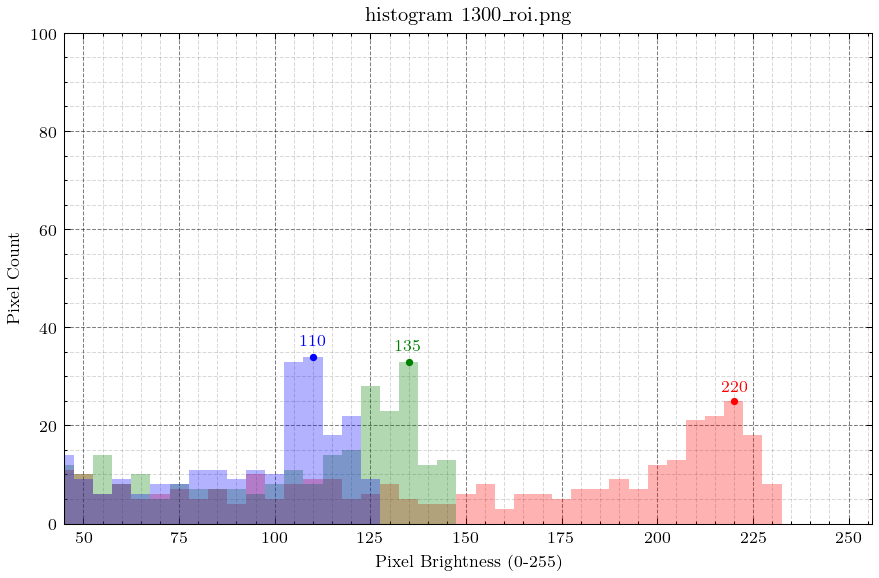

[120:180]


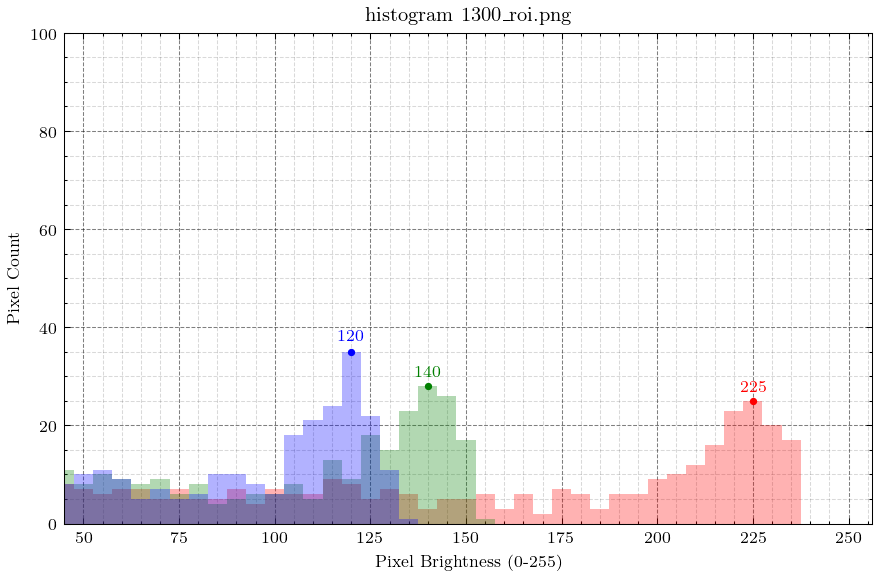

[160:220]


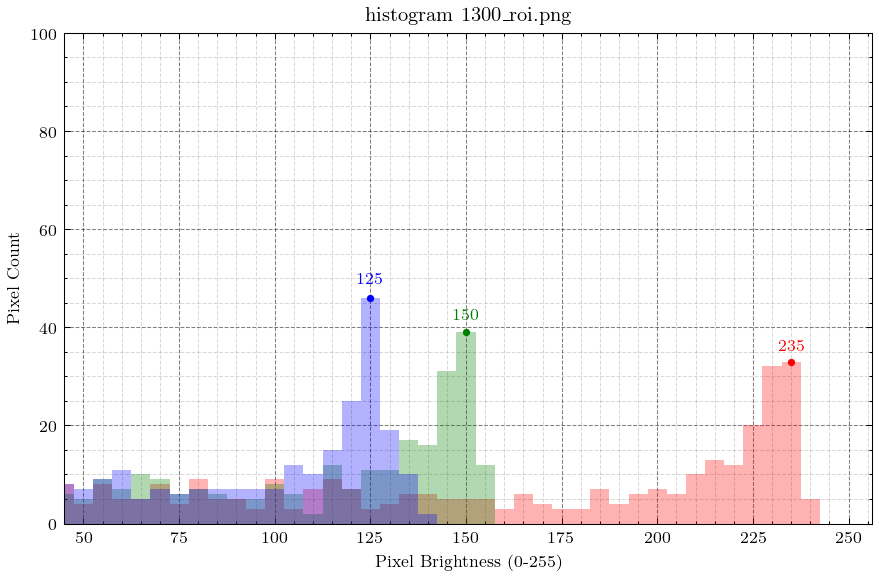

[200:260]


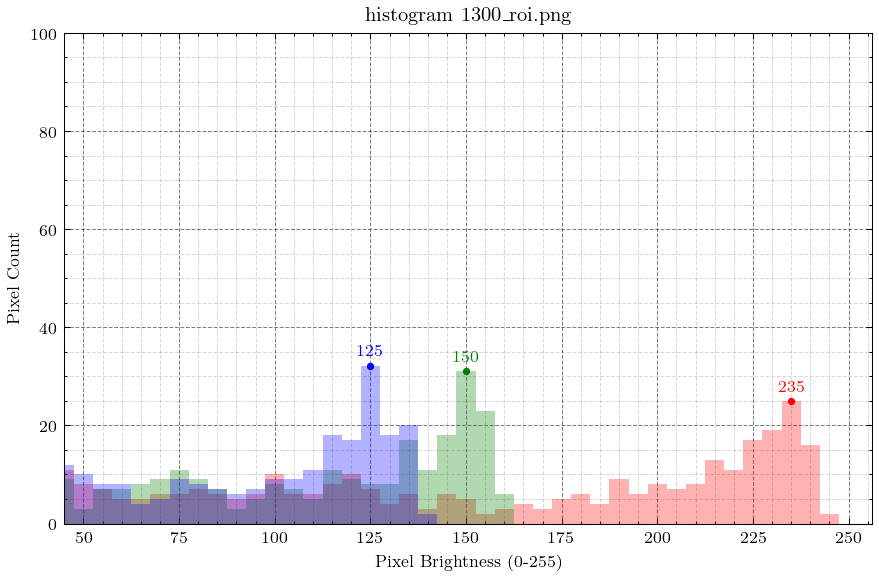

[240:300]


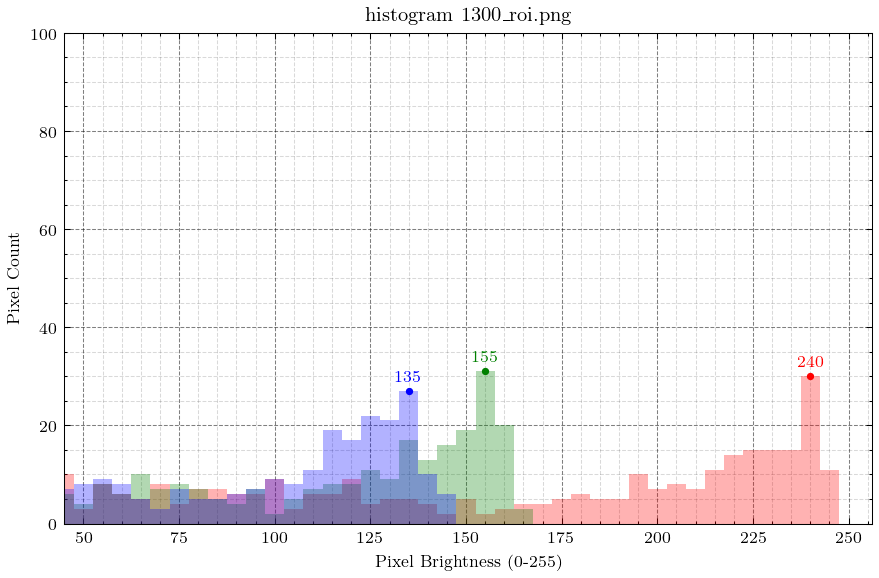

[280:340]


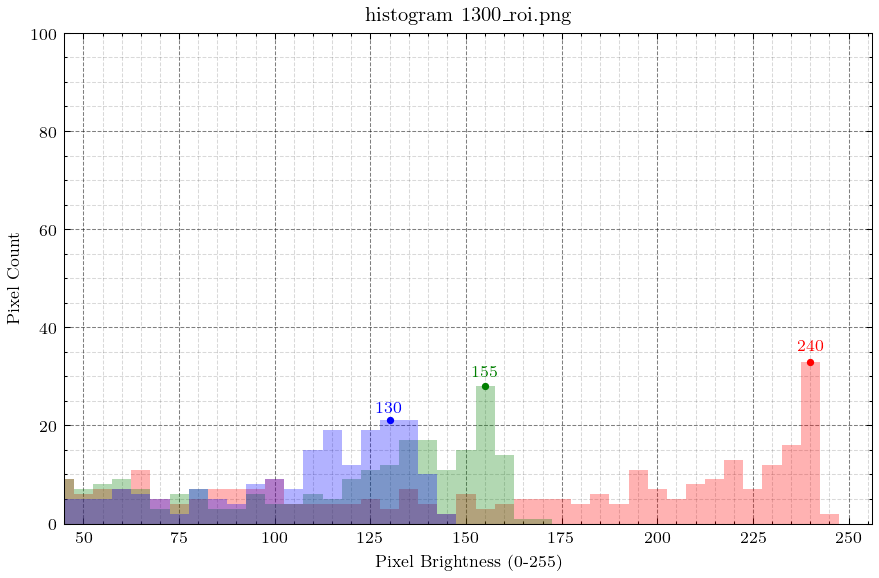

[320:380]


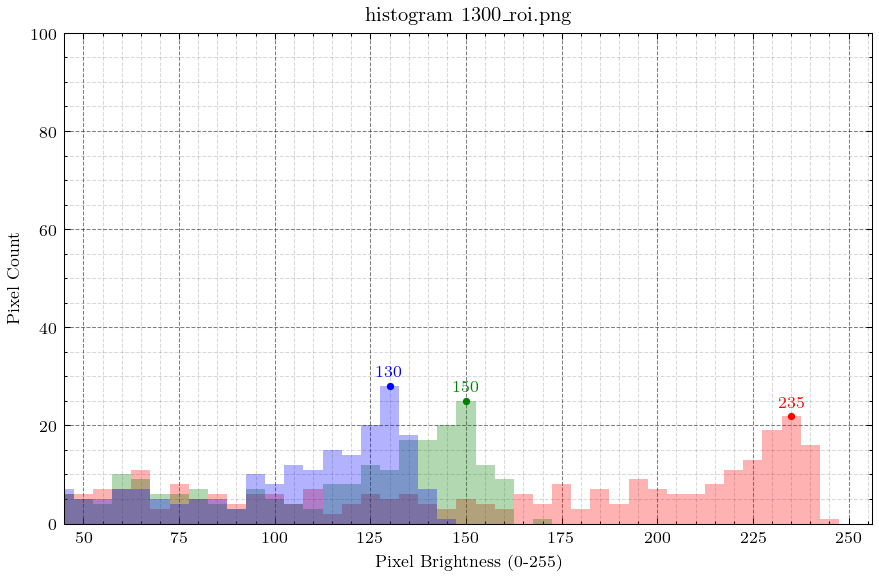

[360:420]


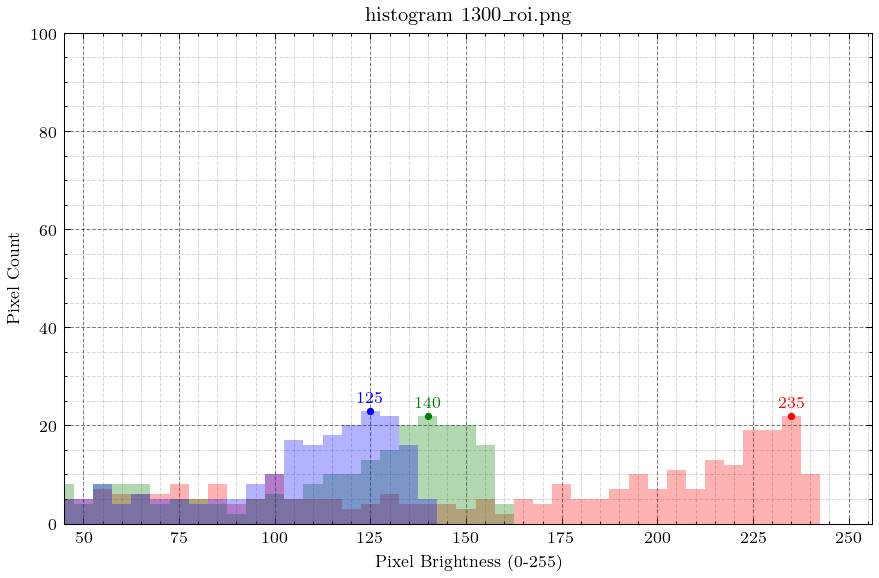

[400:460]


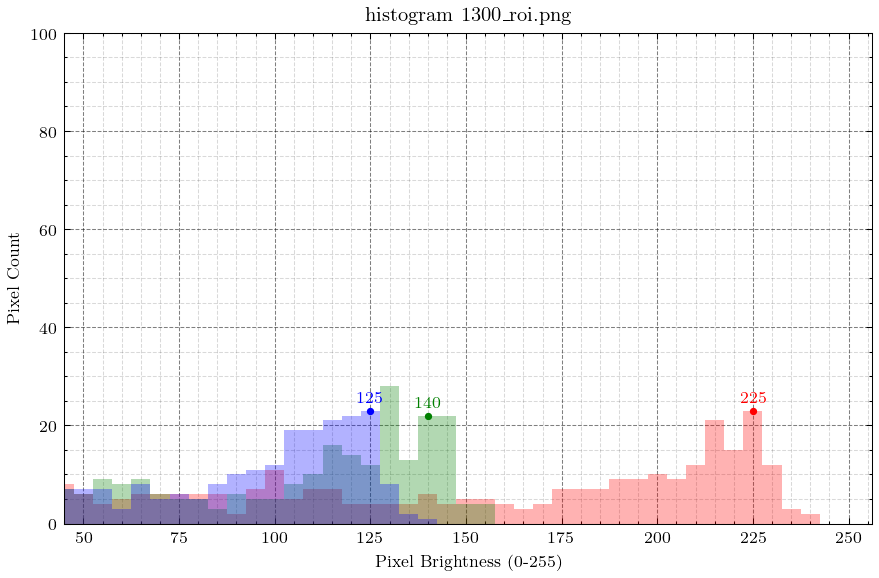

In [335]:
filename = '1300_roi.png'

img = plt.imread(filename)
plt.imshow(img)
plt.show()

step = 40
window = 60
joinbins = 5

for i in range(0, img.shape[0] - window, step):
    print(f'[{i}:{i+window}]')
    image_hist_and_peak(filename, joinbins, plot=True, crop=(i, i+window))

In [336]:
import os
images_path = []
for dirpath, dirnames, filenames in os.walk('.'):
    print(dirpath, dirnames, filenames)
    for filename in filenames:
        if filename.endswith('roi.png'):
            images_path.append(filename)
    break

images_path = sorted(images_path)

. ['images'] ['1220_original.png', '1350_original.png', '1240_roi.png', '1250_roi.png', '1310_original.png', '1530_roi.png', '1520_roi.png', '1260_original.png', '1450_original.png', '1520_original.png', '1560_original.png', '1110_roi.png', '1410_original.png', '1590_roi.png', 'plots.ipynb', '1580_roi.png', '1510_original.png', '1330_roi.png', '1320_roi.png', '1460_original.png', '.DS_Store', '1420_original.png', '1550_original.png', '1440_roi.png', '1450_roi.png', '1360_original.png', '1210_original.png', '1180_original.png', '1390_roi.png', '1380_roi.png', '1250_original.png', '1320_original.png', '1380_original.png', '1340_roi.png', '1350_roi.png', '1160_original.png', '1120_original.png', '1430_roi.png', '1420_roi.png', '1480_original.png', '1490_roi.png', '1480_roi.png', '1230_roi.png', '1220_roi.png', '1580_original.png', '1540_roi.png', '1550_roi.png', '1290_roi.png', '1280_roi.png', '1150_original.png', '1600_roi.png', '1170_roi.png', '1160_roi.png', '1280_original.png', '1110_

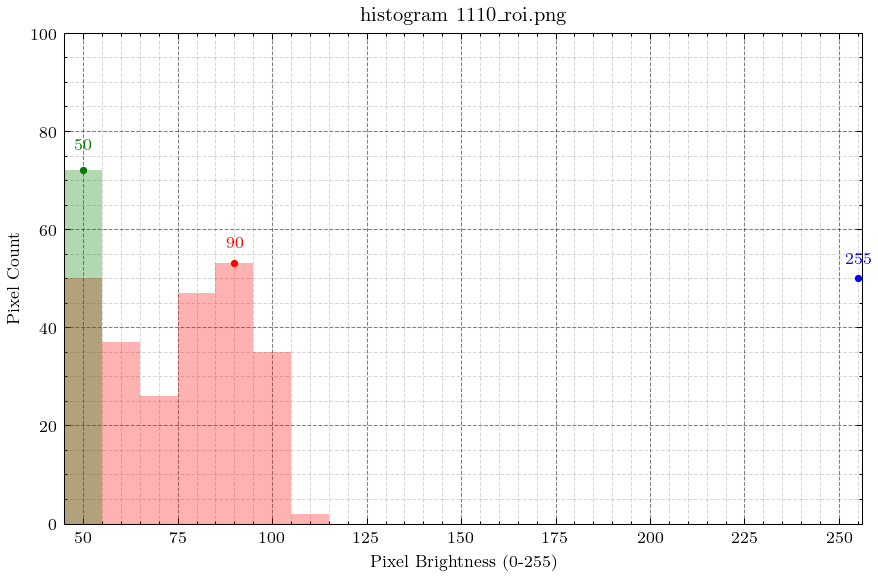

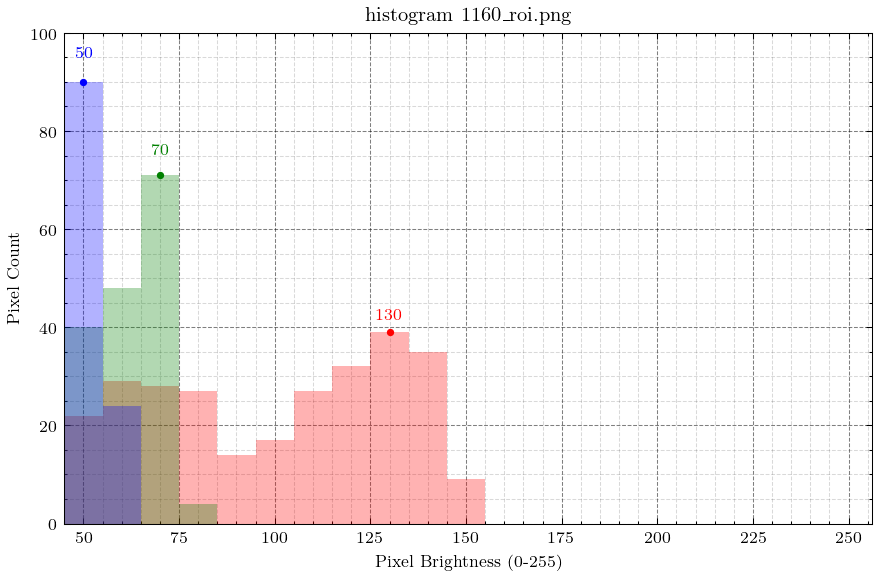

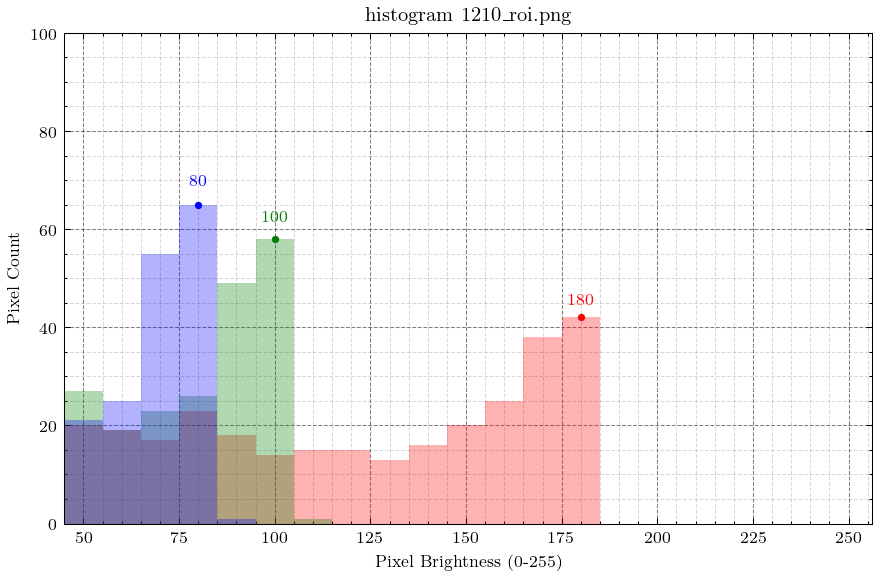

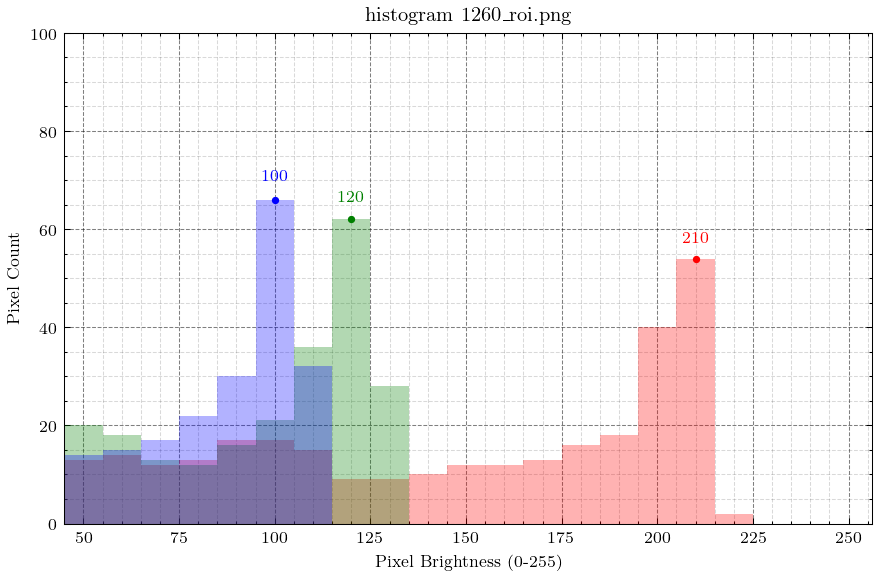

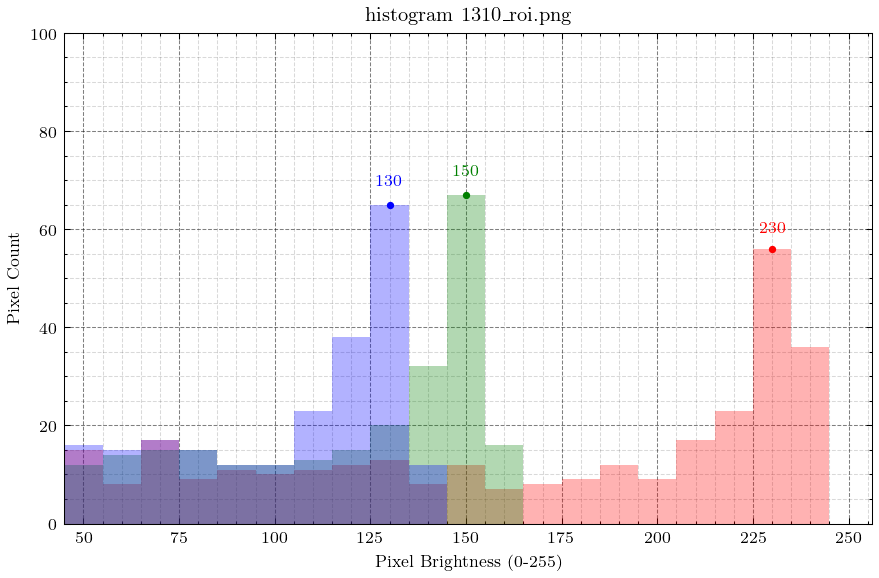

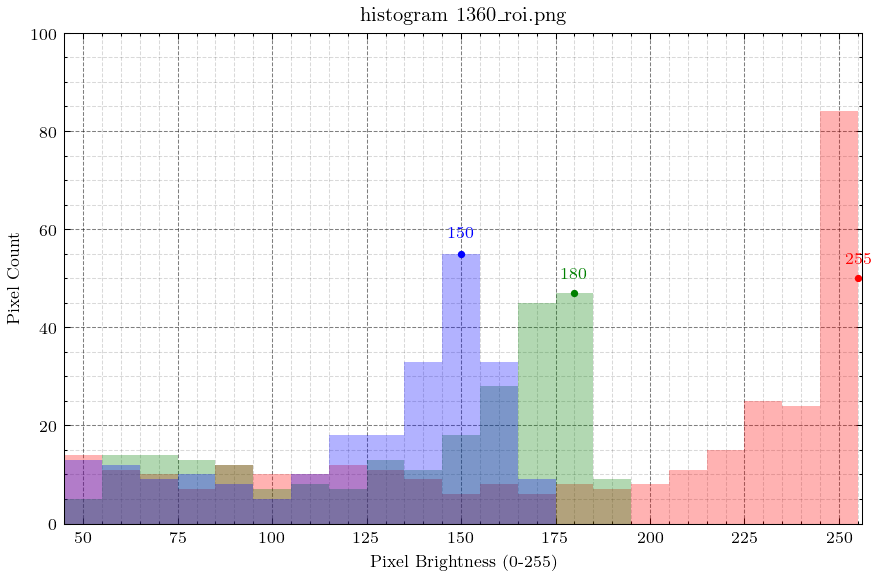

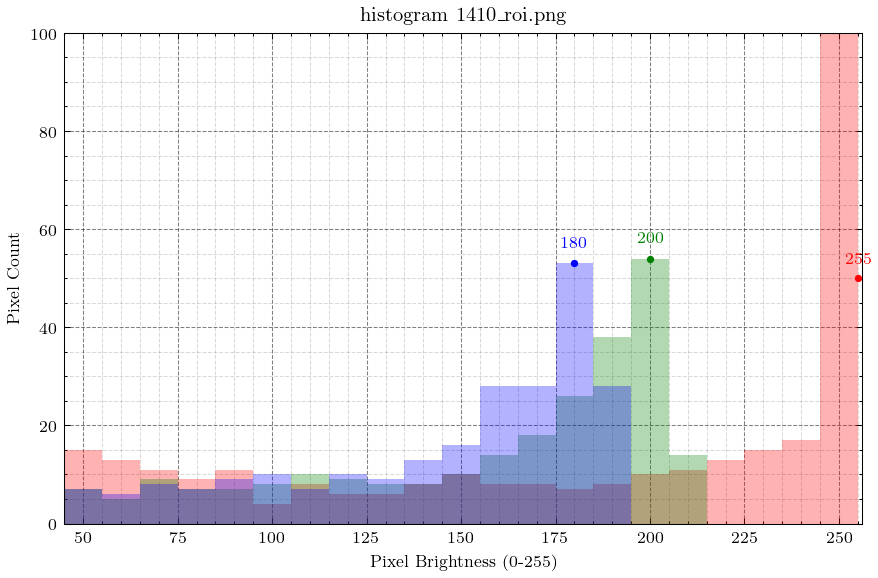

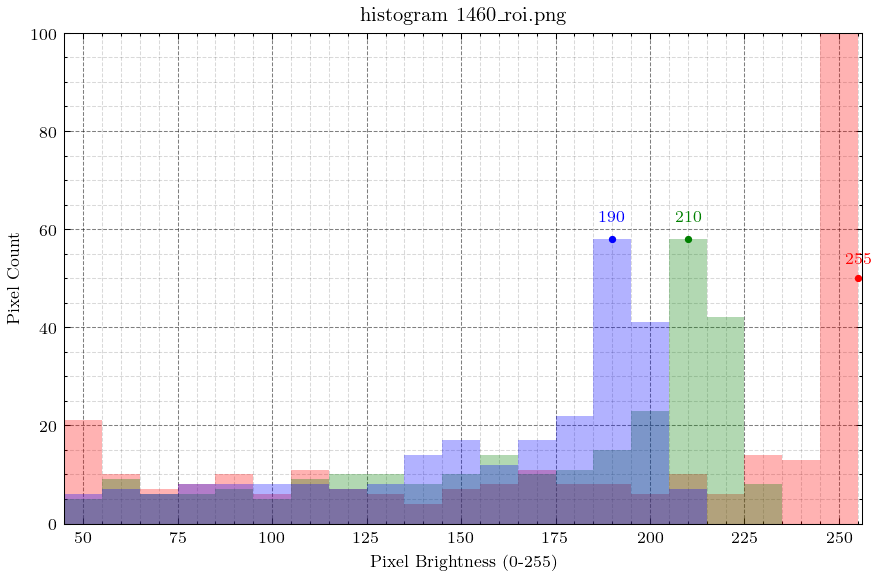

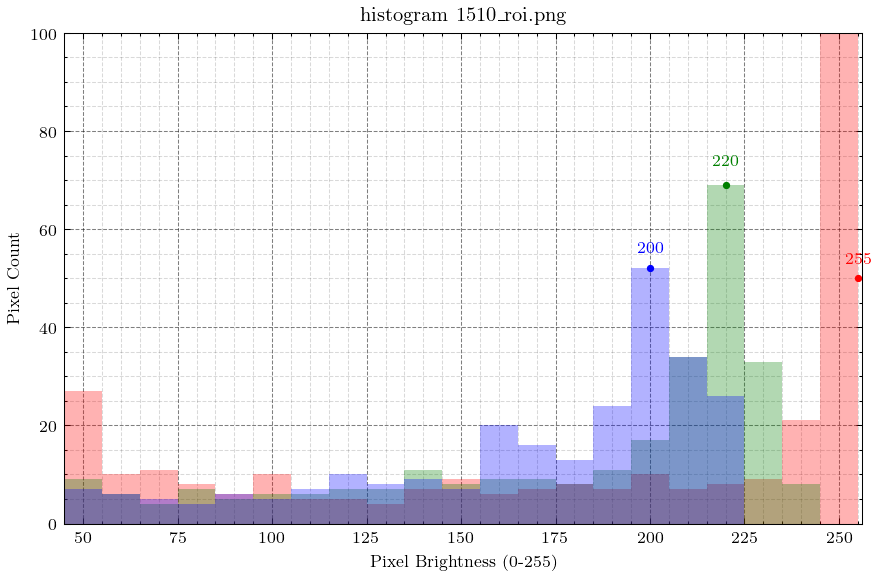

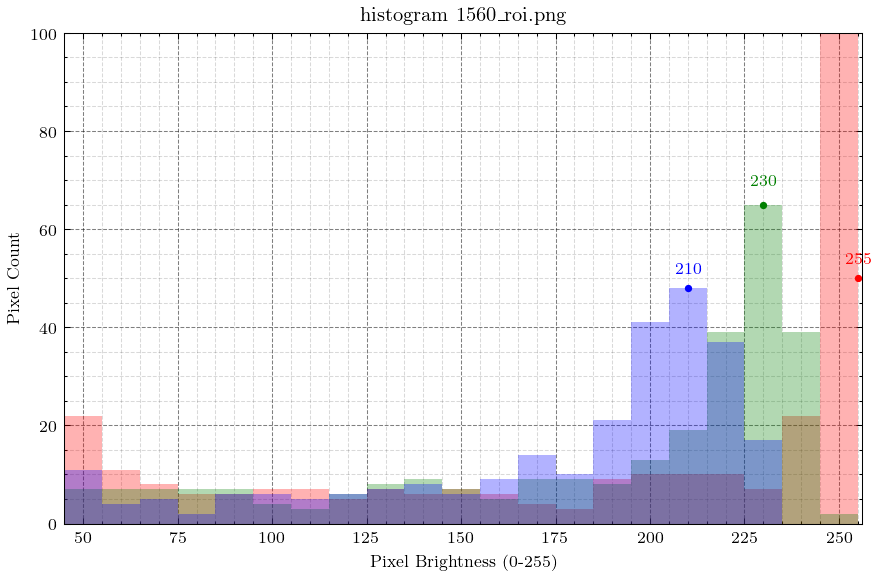

In [341]:
count = 10

for i in range(0, len(images_path), len(images_path) // count):
    path = images_path[i]
    image_hist_and_peak(path, 10, True, True, crop=(160,220))

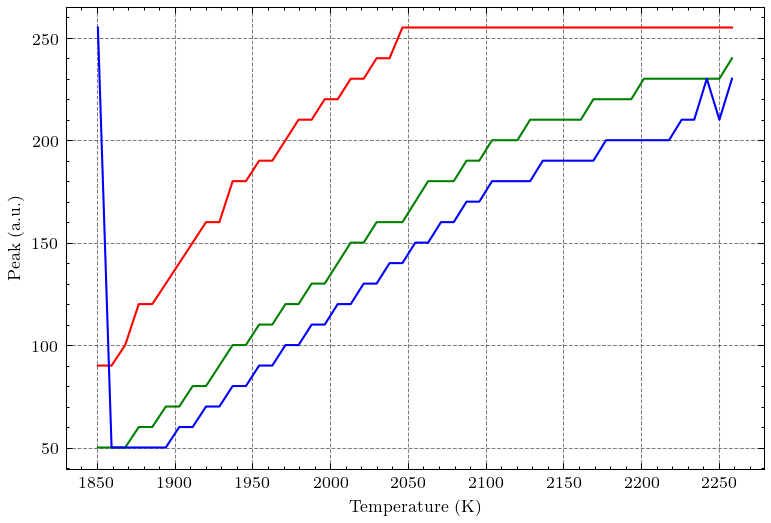

In [342]:
current = np.array([float(name.split('_')[0]) / 1e3 for name in images_path])
peaks_by_color = []
for path in images_path:
    peaks_by_color.append(image_hist_and_peak(path, 10, crop=(160,220)))

fig, ax1 = plt.subplots()


peaks_by_color = np.array(peaks_by_color).T
for peaks, color in zip(peaks_by_color, ['red', 'green', 'blue']):
    plt.plot(T(current), peaks, color=color)

plt.xlabel('Temperature (K)')
plt.ylabel('Peak (a.u.)')

plt.savefig('images/peaks_by_colors.png')
plt.show()